# PCA - Principal Component Analysis
Is a technique used to describe a set of data in terms of new uncorrelated variables ("components"). The components are ordered by the amount of original variance they describe, so the technique is useful for reducing the dimensionality of a data set.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [13]:
seeds = pd.read_csv('datasets/seeds.csv',header=None)
variants = seeds[7]
seeds = seeds.drop(7,axis=1)
seeds

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


## Decorrelating data with PCA

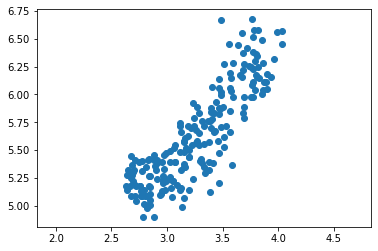

0.8604149377143469

In [3]:
width = seeds.iloc[:,4]
length = seeds.iloc[:,3]
plt.scatter(width, length)
plt.axis('equal')
plt.show()
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)
correlation

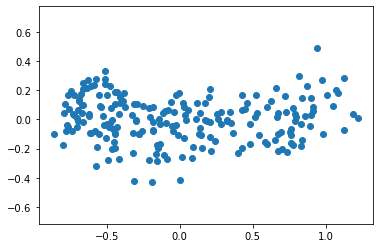

-1.8756697583999227e-17

In [11]:
model = PCA()
pca_features = model.fit_transform(seeds[[4,3]])
xs = pca_features[:,0]
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
correlation

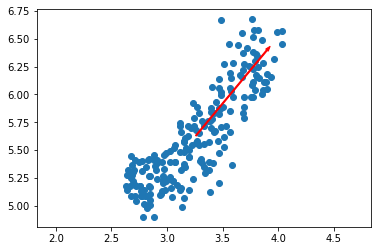

In [12]:
plt.scatter(width, length)

mean = model.mean_
# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Analysis of the intrinsic dimension of the dataset

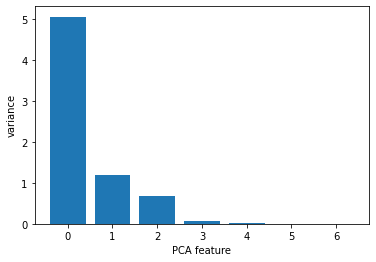

In [18]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(seeds)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [19]:
# Create a PCA model with 2 components
pca = PCA(n_components=2)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(seeds)

# Transform
pca_features = pipeline.transform(seeds)
# Print the shape of pca_features
pca_features.shape

(210, 2)

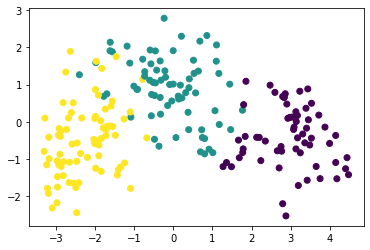

In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
result = model.fit_predict(seeds)
plt.scatter(pca_features[:,0],pca_features[:,1],c=result)
plt.show()